In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.model_selection import train_test_split 


Index(['Tidspunkt', 'Temperatur (°C)', 'Vindhastighet (km/t)', 'Trykk',
       'Nedbør (mm)'],
      dtype='object')


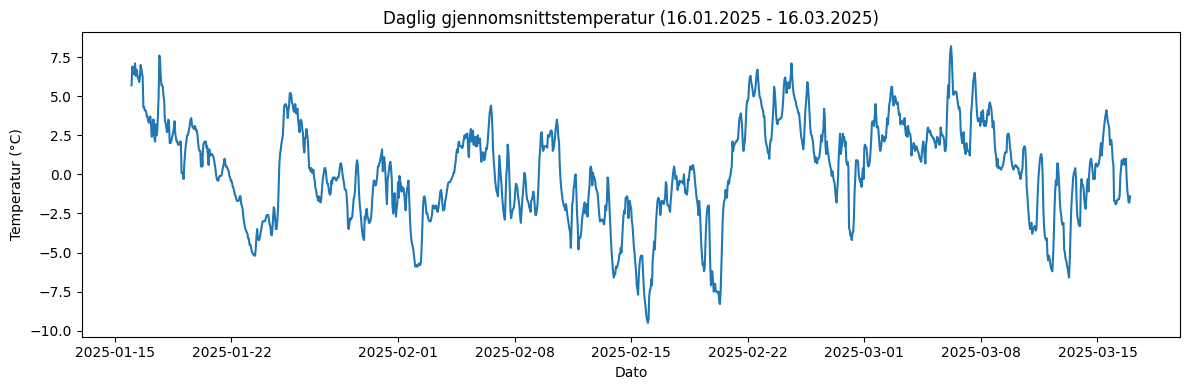

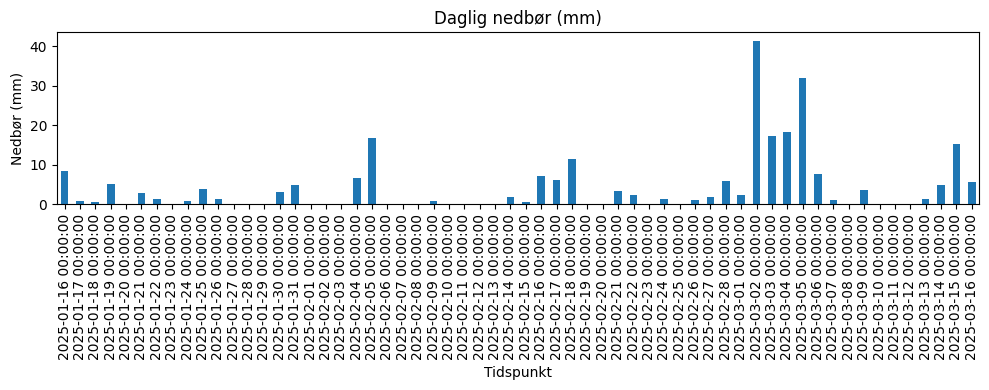

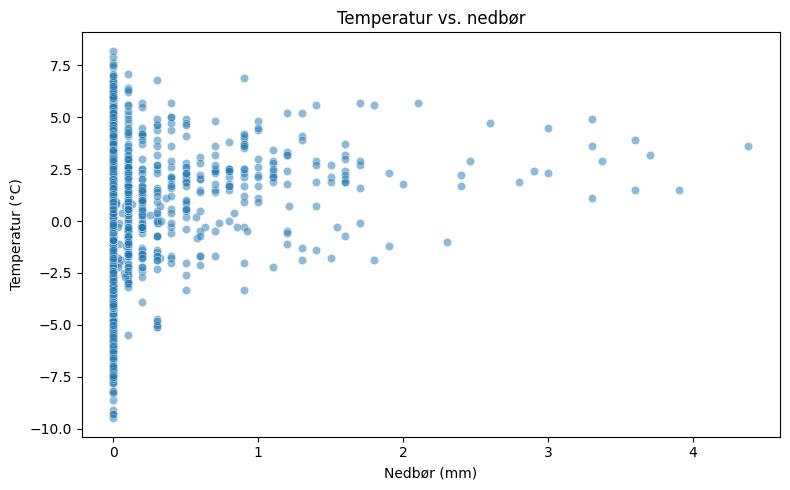

In [19]:
# Last inn datasettet 

file_path = os.path.join("../..", "data", "trondheim_vaerdata_full_1.csv")

df = pd.read_csv(file_path)

df = pd.read_csv(file_path, parse_dates = ['Tidspunkt'])
print(df.columns)

df['year'] = df['Tidspunkt'].dt.year 

df['day_of_year'] = df['Tidspunkt'].dt.dayofyear 

 

# Håndter manglende verdier 

df['Temperatur (°C)'] = df['Temperatur (°C)'].interpolate() 

df = df.dropna(subset=['Temperatur (°C)'])  # Dropper rader uten temperatur 

 

# Visualisering 1: Linjediagram (temperatur over tid) 

plt.figure(figsize=(12, 4)) 

sns.lineplot(data=df, x='Tidspunkt', y='Temperatur (°C)') 

plt.title("Daglig gjennomsnittstemperatur (16.01.2025 - 16.03.2025)") 

plt.xlabel("Dato") 

plt.ylabel("Temperatur (°C)") 

plt.tight_layout() 

plt.show() 

 

# Visualisering 2: Søylediagram (månedlig nedbør) 

monthly_precip = df.resample('D', on='Tidspunkt').sum(numeric_only=True) 

plt.figure(figsize=(10, 4)) 

monthly_precip['Nedbør (mm)'].plot(kind='bar') 

plt.title("Daglig nedbør (mm)") 

plt.ylabel("Nedbør (mm)") 

plt.tight_layout() 

plt.show() 

 

# Visualisering 3: Scatterplot (temperatur vs. nedbør) 

plt.figure(figsize=(8, 5)) 

sns.scatterplot(data=df, x='Nedbør (mm)', y='Temperatur (°C)', alpha=0.5) 

plt.title("Temperatur vs. nedbør") 

plt.xlabel("Nedbør (mm)") 

plt.ylabel("Temperatur (°C)") 

plt.tight_layout() 

plt.show() 

 

Index(['Tidspunkt', 'Temperatur (°C)', 'Vindhastighet (km/t)', 'Trykk',
       'Nedbør (mm)', 'year', 'day_of_year', 'month', 'day_of_month'],
      dtype='object')
MAE: 3.365178923545011
RMSE: 3.8582227596830525


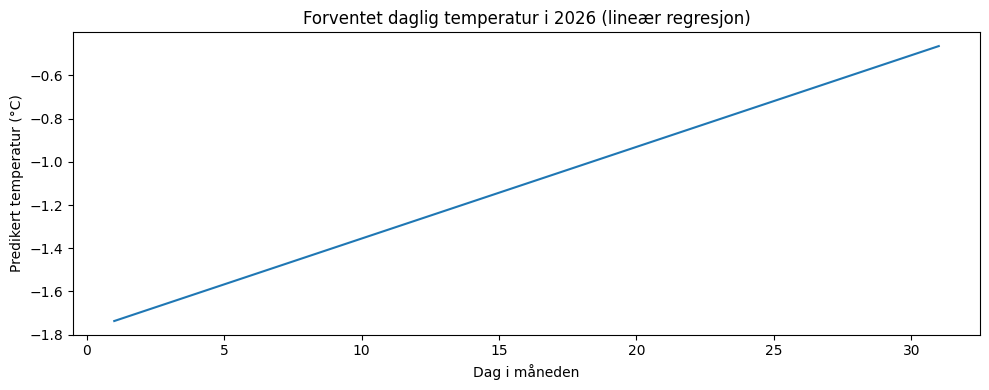

In [21]:

df['month'] = df['Tidspunkt'].dt.month
df['day_of_month'] = df['Tidspunkt'].dt.day

print(df.columns)


# ---- Modelltrening ---- 

# Velg features og target 

features = df[['month', 'day_of_month']] 

target = df['Temperatur (°C)'] 

 

# Tren på data før 2025, test på 2025 

X_train = features[df['month'] < 3] 

X_test = features[df['month'] == 3] 

y_train = target[df['month'] < 3] 

y_test = target[df['month'] == 3] 

 

# Tren modellen 

model = LinearRegression() 

model.fit(X_train, y_train) 

 

# Evaluer modellen 

y_pred = model.predict(X_test) 

print("MAE:", mean_absolute_error(y_test, y_pred)) 

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) 

 
# ---- Prediksjon for 2026 ---- 

future_2026 = pd.DataFrame({ 

    'month': [3] * 31, 

    'day_of_month': list(range(1, 32))  # Dager fra 1 til 31 

}) 

 

future_2026['predicted_temperature'] = model.predict(future_2026) 

 

# Visualiser prediksjonen 

plt.figure(figsize=(10, 4)) 

plt.plot(future_2026['day_of_month'], future_2026['predicted_temperature']) 

plt.title("Forventet daglig temperatur i 2026 (lineær regresjon)") 

plt.xlabel("Dag i måneden") 

plt.ylabel("Predikert temperatur (°C)") 

plt.tight_layout() 

plt.show()
